In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

1.Prepare the data. Create dummy variables for categorical variables. 

In [4]:
data = pd.read_csv("adult.data",names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],sep=',')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [7]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [9]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [10]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [11]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [17]:
data1=pd.get_dummies(data, columns=["sex","workclass","race","relationship","occupation","education","marital-status"])
data1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,sex_ Female,sex_ Male,...,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,39,77516,13,2174,0,40,United-States,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,United-States,<=50K,0,1,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,40,United-States,<=50K,0,1,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,7,0,0,40,United-States,<=50K,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,Cuba,<=50K,1,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   age                                    32561 non-null  int64 
 1   fnlwgt                                 32561 non-null  int64 
 2   education-num                          32561 non-null  int64 
 3   capital-gain                           32561 non-null  int64 
 4   capital-loss                           32561 non-null  int64 
 5   hours-per-week                         32561 non-null  int64 
 6   native-country                         32561 non-null  object
 7   income                                 32561 non-null  object
 8   sex_ Female                            32561 non-null  uint8 
 9   sex_ Male                              32561 non-null  uint8 
 10  workclass_ ?                           32561 non-null  uint8 
 11  workclass_ Fede

2. Analyze the data to get relevant insight.

In [19]:
data1_corr=data1.corr()
data1_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,workclass_ ?,workclass_ Federal-gov,...,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.088832,0.088832,0.042627,0.051227,...,0.012146,0.060651,-0.111262,0.129975,-0.011896,0.315679,0.016698,-0.534359,0.010210,0.265177
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.026858,0.026858,-0.002923,-0.007525,...,0.017303,-0.005231,-0.005269,-0.014973,-0.000406,-0.026363,0.003634,0.037108,0.028467,-0.026246
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.012280,0.012280,-0.077946,0.060518,...,-0.139801,0.256600,-0.016845,-0.007771,0.000964,0.086078,-0.034223,-0.032109,-0.055152,-0.068044
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.048480,0.048480,-0.015585,-0.005768,...,-0.000961,0.169658,-0.034826,-0.018798,-0.002322,0.085873,-0.006542,-0.066334,-0.013233,-0.012166
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.045567,0.045567,-0.016102,0.010798,...,-0.002046,0.047923,-0.020884,-0.022396,-0.005760,0.080466,-0.008355,-0.060623,-0.013061,-0.003361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marital-status_ Married-civ-spouse,0.315679,-0.026363,0.086078,0.085873,0.080466,0.212817,-0.431805,0.431805,-0.055685,0.010732,...,-0.005386,0.068752,-0.079143,-0.366837,-0.024536,1.000000,-0.105238,-0.644866,-0.166374,-0.163673
marital-status_ Married-spouse-absent,0.016698,0.003634,-0.034223,-0.006542,-0.008355,-0.007089,0.038692,-0.038692,0.006423,-0.002135,...,0.023078,-0.009094,-0.011517,-0.045331,-0.003032,-0.105238,1.000000,-0.079687,-0.020559,-0.020225
marital-status_ Never-married,-0.534359,0.037108,-0.032109,-0.066334,-0.060623,-0.197936,0.171434,-0.171434,0.046399,-0.027056,...,0.008713,-0.047626,0.084870,-0.277772,-0.018579,-0.644866,-0.079687,1.000000,-0.125980,-0.123935
marital-status_ Separated,0.010210,0.028467,-0.055152,-0.013233,-0.013061,-0.016587,0.109135,-0.109135,0.006256,-0.004388,...,-0.002693,-0.013519,-0.004015,-0.071665,-0.004793,-0.166374,-0.020559,-0.125980,1.000000,-0.031975


In [23]:
data_corr= data.corr()
data_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


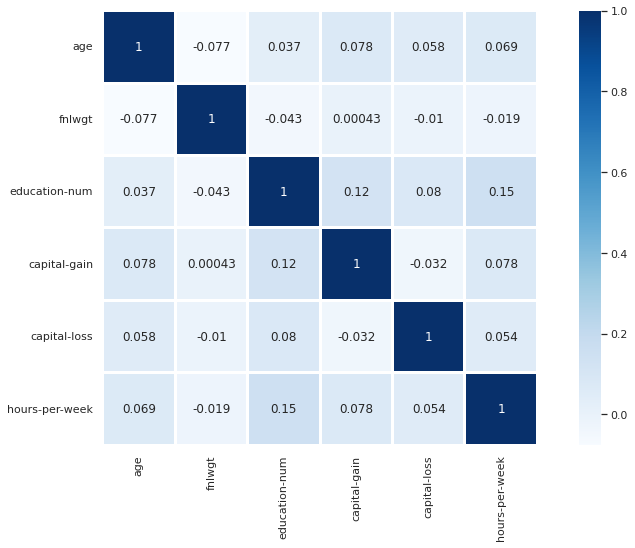

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_corr,annot=True,linewidths=2,square=True, cmap='Blues')

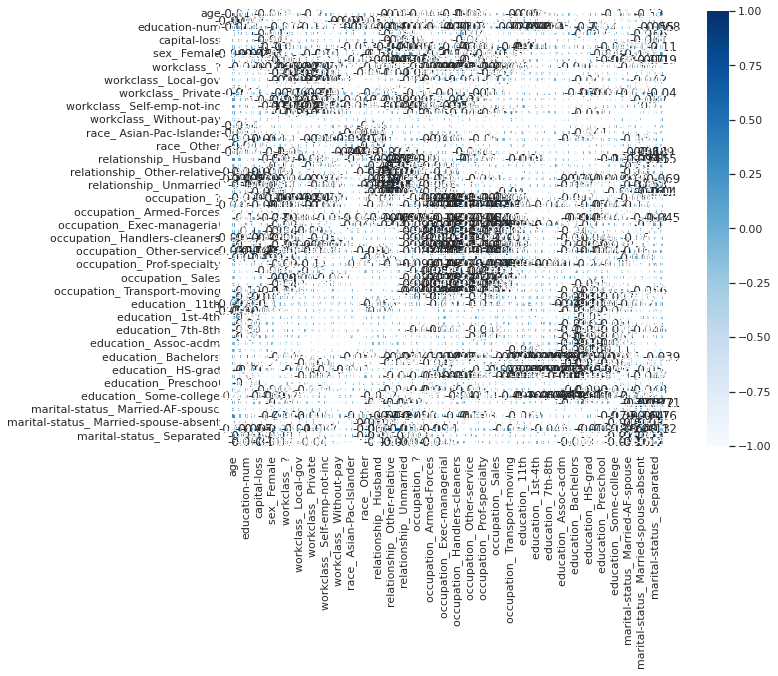

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data1_corr,annot=True,linewidths=2,square=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


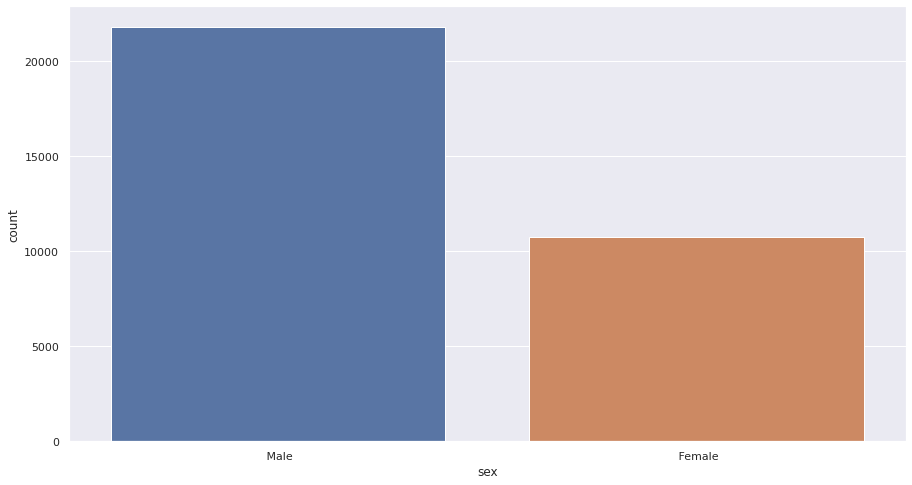

In [25]:
sns.countplot(data['sex'])

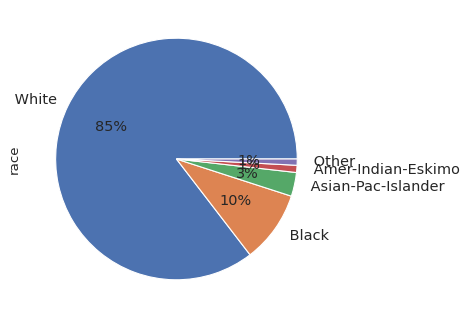

In [26]:
fig = plt.figure(figsize=(5,5), dpi=80)
data['race'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

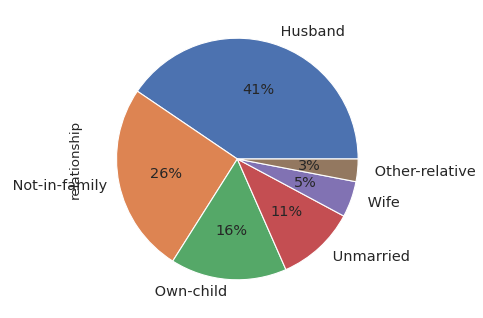

In [27]:
fig = plt.figure(figsize=(5,5), dpi=80)
data['relationship'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

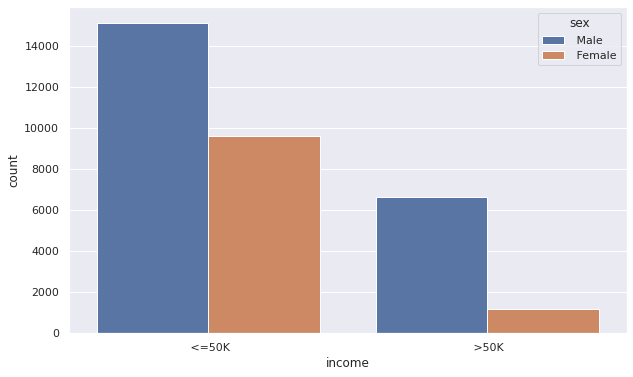

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'income', hue = 'sex')

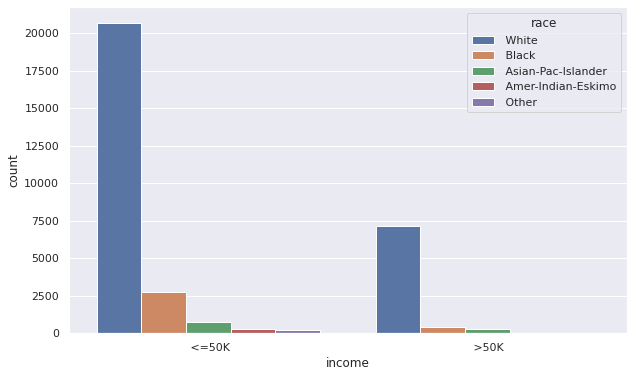

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'income', hue = 'race')

3. Get feature matrix X, and target variable y (>50k or <50k)

In [59]:
data2=data1.drop(columns=['native-country','capital-gain','capital-loss','fnlwgt','education-num'])
data2.head()

,age,hours-per-week,income,sex_ Female,sex_ Male,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,39,40,<=50K,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,<=50K,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,40,<=50K,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,53,40,<=50K,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28,40,<=50K,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [60]:
X=data2.drop(columns=['income'])
Y=data2['income']
Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [61]:
lm = LabelEncoder()


In [62]:
data2['income']=lm.fit_transform(data2['income'])
data2['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [63]:
Y=data2['income']
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [64]:
X

,age,hours-per-week,sex_ Female,sex_ Male,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,39,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,40,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,53,40,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,40,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32557,40,40,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,40,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,20,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


5.Normalize data using MinMaxScaler

In [65]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(np.array(X['age']).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
X['age']=minmax_df
minmax_df = scaler.fit_transform(np.array(X['hours-per-week']).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
X['hours-per-week']=minmax_df
X.tail(20)

,age,hours-per-week,sex_ Female,sex_ Male,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
32541,0.328767,0.316327,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32542,0.753425,0.244898,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32543,0.383562,0.479592,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32544,0.191781,0.295918,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
32545,0.301370,0.193878,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32546,0.273973,0.397959,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
32547,0.356164,0.397959,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32548,0.657534,0.602041,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
32549,0.356164,0.397959,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
32550,0.356164,0.500000,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


4. Split data into training and testing

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 111)

6.Create a LogisticRegression object for modeling

7.Train the model with training data

In [76]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [77]:
predict = model.predict(xtest)

8.Compare the precision, recall, and F1-score on the train and test data.

In [78]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4947
           1       0.69      0.56      0.62      1566

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.83      0.83      6513


 metrics.confusion_matrix(ytest, predict) 
 [[4542  405]
 [ 682  884]]

 metrics.accuracy_score(ytest, predict) 
 0.8331030247197911


9.Improve the performance of your model on the test data.

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 111)

In [80]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [81]:
predict = model.predict(xtest)

In [82]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      7396
           1       0.70      0.56      0.63      2373

    accuracy                           0.84      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769


 metrics.confusion_matrix(ytest, predict) 
 [[6822  574]
 [1033 1340]]

 metrics.accuracy_score(ytest, predict) 
 0.8355000511823114
